# Causal Inference and Discovery in Python

## Chapter 04 - Graphical Models

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import graphviz
from scipy import stats
import statsmodels.api as sm
from itertools import combinations

plt.style.use('fivethirtyeight')
COLORS = ['#00B0F0','#FF0000']

## Visualizations

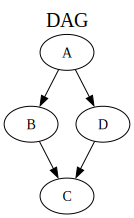

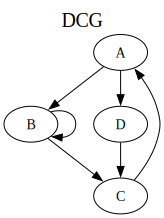

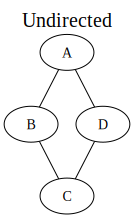

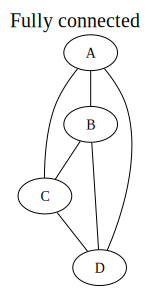

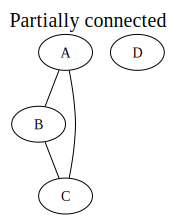

In [3]:
from graphviz import Digraph, Graph
from IPython.display import display

# Define the graph types and edges
nodes = ['A', 'B', 'C', 'D']

# Define graphs
graphs = {
    'DAG': {
        'graph': Digraph(format='png'),
        'edges': ['AB', 'BC', 'AD', 'DC']
    },
    
    'DCG': {
        'graph': Digraph(format='png'),
        'edges': ['AB', 'AD', 'BB', 'BC', 'DC', 'CA']
    },
    
    'Undirected': {
        'graph': Graph(format='png'),
        'edges': ['AB', 'BC', 'AD', 'DC']
    }, 
    
    'Fully connected': {
        'graph': Graph(format='png'),
        'edges': ['AB', 'AC', 'AD', 'BC', 'BD', 'CD']
    },
    
    'Partially connected': {
        'graph': Graph(format='png'),
        'edges': ['AB', 'AC', 'BC']
    }
}

# Display graphs inline
for name, graph in graphs.items():
    g = graph['graph']
    g.attr(label=name, labelloc="top", fontsize='20')  # Add title
    [g.node(n) for n in nodes]                         # Add nodes
    g.edges(graph['edges'])                            # Add edges
    
    display(g)                                         # Display the graph inline in Jupyter

## Adjacency matrices

$$\Large \begin{bmatrix} 0 & 1 \\ 0 & 0 \end{bmatrix}$$

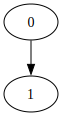

In [4]:
graph = graphviz.Digraph(format='png')

nodes = ['0', '1']

edges = ['01']

[graph.node(n) for n in nodes]
graph.edges(edges)

#graph.render(f'images/ch_04_graph_adj_00')

graph

$$\Large \begin{bmatrix} 0 & 1 & 0 \\ 0 & 0 & 0 \\ 1 & 1 & 0 \end{bmatrix}$$

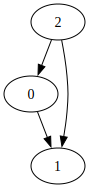

In [5]:
graph = graphviz.Digraph(format='png')

nodes = ['0', '1', '2']

edges = ['01', '21', '20']

[graph.node(n) for n in nodes]
graph.edges(edges)

#graph.render(f'images/ch_04_graph_adj_01')

graph

$$\Large \begin{bmatrix} 0 & 0 & 1 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 0 & 0 \\ 1 & 0 & 1 & 0 \end{bmatrix}$$

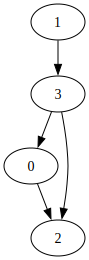

In [6]:
graph = graphviz.Digraph(format='png')

nodes = ['0', '1', '2', '3']

edges = ['02', '13', '32', '30']

[graph.node(n) for n in nodes]
graph.edges(edges)

#graph.render(f'img/ch_04_graph_adj_02')

graph

# Chapter 05 - Forks, Chains, and Immoralities

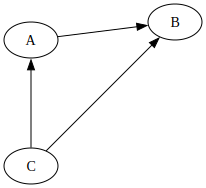

In [7]:
graph = graphviz.Digraph(format='png', engine='neato')

nodes = ['A', 'B', 'C']
positions = ['0,2.75!', '2,3!', '0,1!']

edges = ['AB', 'CB', 'CA']

[graph.node(n, pos=pos) for n, pos in zip(nodes, positions)]
graph.edges(edges)

#graph.render(f'images/ch_05_markov_01')

graph

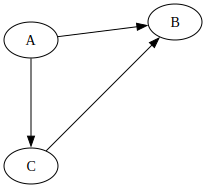

In [8]:
graph = graphviz.Digraph(format='png', engine='neato')

nodes = ['A', 'B', 'C']
positions = ['0,2.75!', '2,3!', '0,1!']

edges = ['AB', 'CB', 'AC']

[graph.node(n, pos=pos) for n, pos in zip(nodes, positions)]
graph.edges(edges)

#graph.render(f'images/ch_05_markov_02')

graph

## Causal graphs and independence

In [9]:
NOISE_LEVEL = .2
N_SAMPLES = 1000

### A chain: `A -> B -> C`

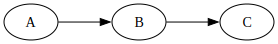

In [10]:
graph = graphviz.Digraph(format='png', engine='neato')

nodes = ['A', 'B', 'C']
positions = ['0,0!', '1.5,0!', '3,0!']

edges = ['AB', 'BC']

[graph.node(n, pos=pos) for n, pos in zip(nodes, positions)]
graph.edges(edges)

#graph.render(f'images/ch_05_chain_00')

graph

In [11]:
# Generate the data
a = np.random.randn(N_SAMPLES) 
b = a + NOISE_LEVEL*np.random.randn(N_SAMPLES) 
c = b + NOISE_LEVEL*np.random.randn(N_SAMPLES) 

# Get combinations
combs = list(combinations([('a', a), ('b', b), ('c', c)], 2))

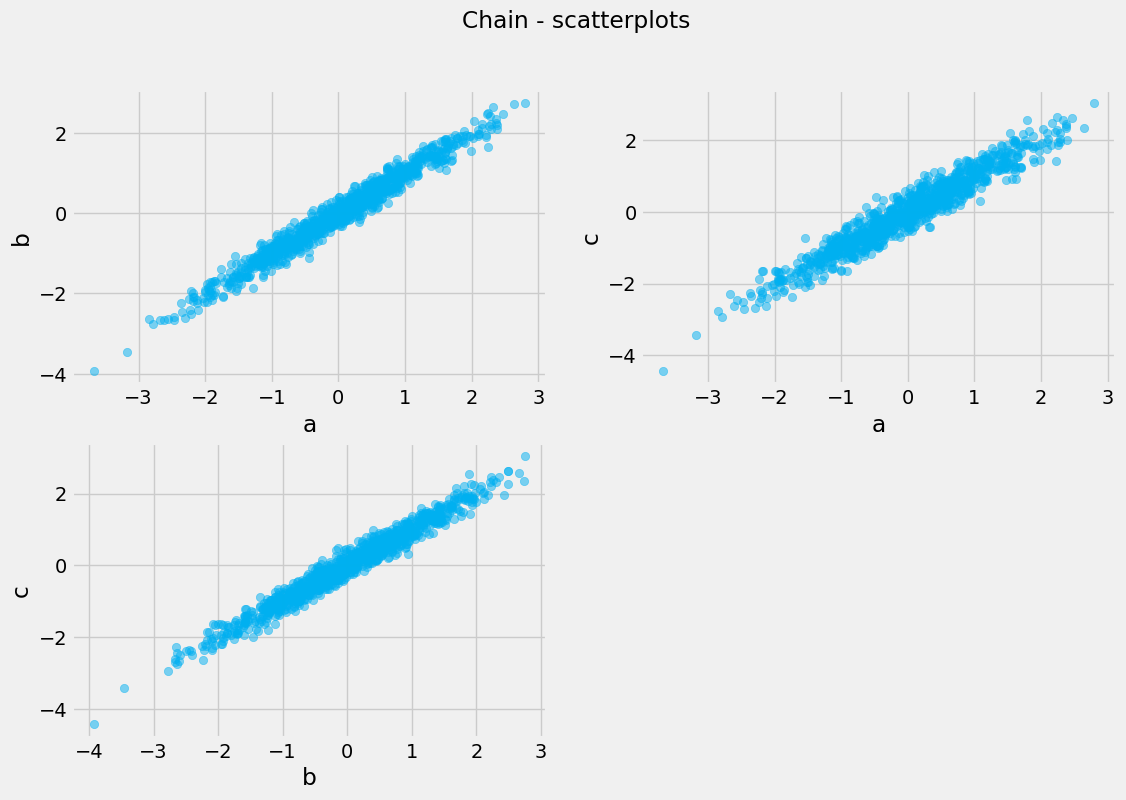

In [12]:
# Plot
plt.figure(figsize=(12, 8))

for i, comb in enumerate(combs):
    key_1, key_2 = comb[0][0], comb[1][0]
    
    
    plt.subplot(2, 2, i + 1)
    plt.scatter(comb[0][1], comb[1][1], alpha=.5, color=COLORS[0])
    plt.xlabel(key_1)
    plt.ylabel(key_2)

plt.suptitle('Chain - scatterplots')
plt.show();

In [13]:
X = pd.DataFrame(np.vstack([a, b]).T, columns=['A', 'B'])
X = sm.add_constant(X, prepend=True)

model = sm.OLS(c, X)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                 1.348e+04
Date:                Wed, 25 Jun 2025   Prob (F-statistic):               0.00
Time:                        14:02:27   Log-Likelihood:                 192.26
No. Observations:                1000   AIC:                            -378.5
Df Residuals:                     997   BIC:                            -363.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0018      0.006      0.287      0.7

### A fork: `A <- B -> C`

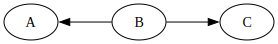

In [14]:
graph = graphviz.Digraph(format='png', engine='neato')

nodes = ['A', 'B', 'C']
positions = ['0,0!', '1.5,0!', '3,0!']

edges = ['BA', 'BC']

[graph.node(n, pos=pos) for n, pos in zip(nodes, positions)]
graph.edges(edges)

#graph.render(f'images/ch_05_fork_00')

graph

In [15]:
# Generate the data
b = np.random.randn(N_SAMPLES) 
a = b + NOISE_LEVEL*np.random.randn(N_SAMPLES) 
c = b + NOISE_LEVEL*np.random.randn(N_SAMPLES) 

# Get combinations
combs = list(combinations([('a', a), ('b', b), ('c', c)], 2))

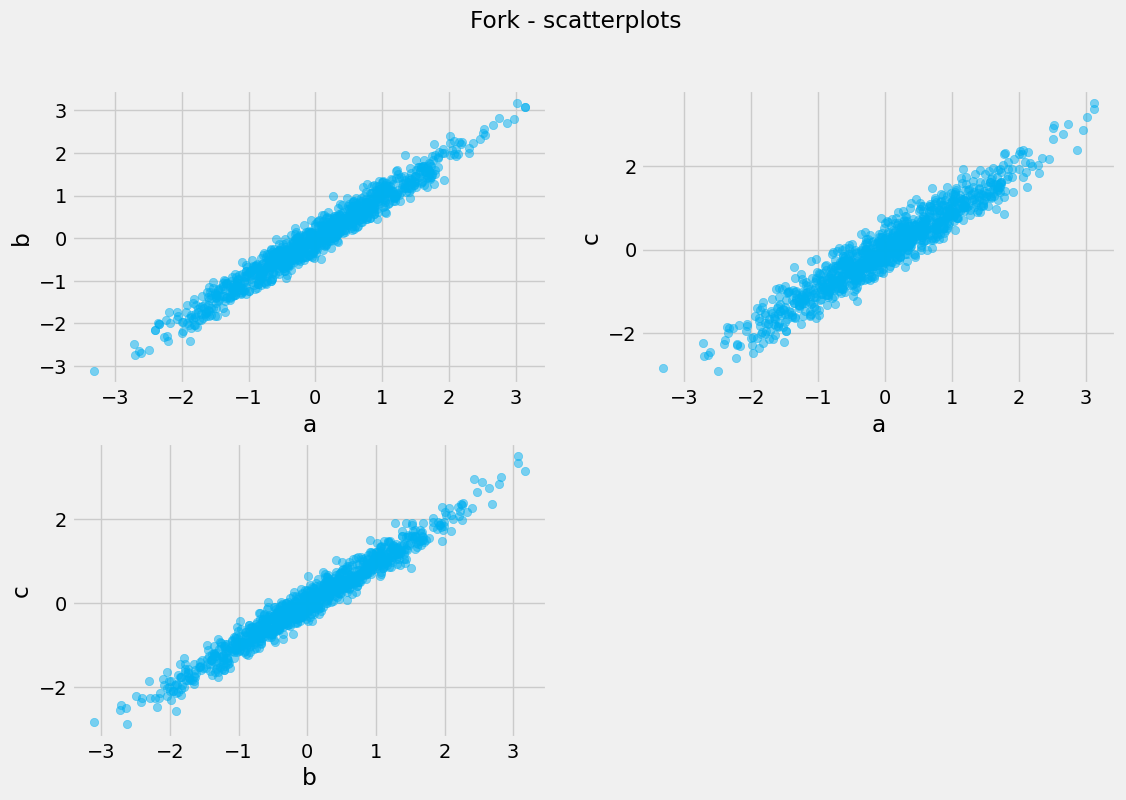

In [16]:
# Plot
plt.figure(figsize=(12, 8))

for i, comb in enumerate(combs):
    key_1, key_2 = comb[0][0], comb[1][0]
    
    
    plt.subplot(2, 2, i + 1)
    plt.scatter(comb[0][1], comb[1][1], alpha=.5, color=COLORS[0])
    plt.xlabel(key_1)
    plt.ylabel(key_2)

plt.suptitle('Fork - scatterplots')
plt.show()

In [17]:
X = pd.DataFrame(np.vstack([a, b]).T, columns=['A', 'B'])
X = sm.add_constant(X, prepend=True)

model = sm.OLS(c, X)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                 1.231e+04
Date:                Wed, 25 Jun 2025   Prob (F-statistic):               0.00
Time:                        14:02:27   Log-Likelihood:                 184.96
No. Observations:                1000   AIC:                            -363.9
Df Residuals:                     997   BIC:                            -349.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0011      0.006      0.170      0.8

### A collider: `A -> B <- C`

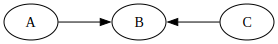

In [18]:
graph = graphviz.Digraph(format='png', engine='neato')

nodes = ['A', 'B', 'C']
positions = ['0,0!', '1.5,0!', '3,0!']

edges = ['AB', 'CB']

[graph.node(n, pos=pos) for n, pos in zip(nodes, positions)]
graph.edges(edges)

#graph.render(f'images/ch_05_collider_00')

graph

In [19]:
# Generate the data
a = np.random.randn(N_SAMPLES) 
c = np.random.randn(N_SAMPLES) 
b = a + c + NOISE_LEVEL*np.random.randn(N_SAMPLES) 

# Get combinations
combs = list(combinations([('a', a), ('b', b), ('c', c)], 2))

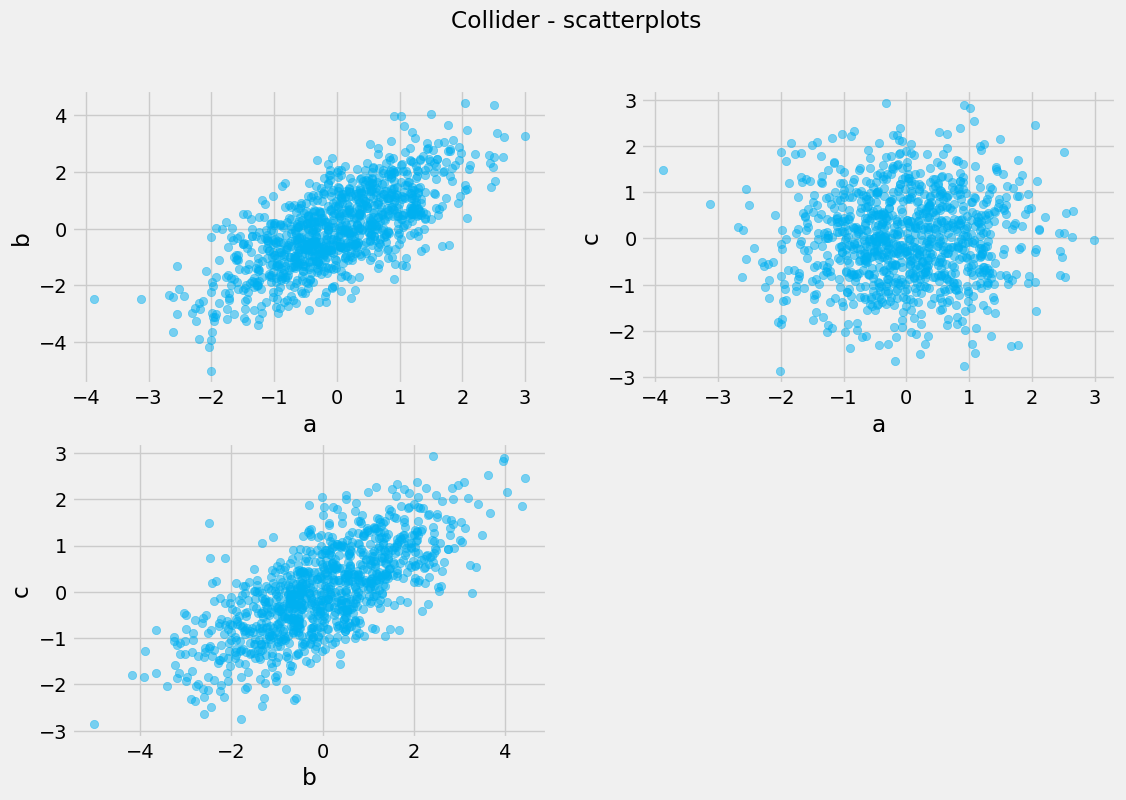

In [20]:
# Plot
plt.figure(figsize=(12, 8))

for i, comb in enumerate(combs):
    key_1, key_2 = comb[0][0], comb[1][0]
    
    
    plt.subplot(2, 2, i + 1)
    plt.scatter(comb[0][1], comb[1][1], alpha=.5, color=COLORS[0])
    plt.xlabel(key_1)
    plt.ylabel(key_2)

plt.suptitle('Collider - scatterplots')
plt.show()

In [21]:
X = pd.DataFrame(np.vstack([a, b]).T, columns=['A', 'B'])
X = sm.add_constant(X, prepend=True)

model = sm.OLS(c, X)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                 1.185e+04
Date:                Wed, 25 Jun 2025   Prob (F-statistic):               0.00
Time:                        14:02:28   Log-Likelihood:                 208.04
No. Observations:                1000   AIC:                            -410.1
Df Residuals:                     997   BIC:                            -395.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0008      0.006      0.131      0.8

    Chain: A->B->C       P>|t|

    A                    0.285
    B                    0.000 (is significant)

    Fork: A<-B->C        P>|t|

    A                    0.332
    B                    0.000 (is significant)

    Collider: A->B<-C    P>|t|

    A                    0.000 (is significant)
    B                    0.000 (is significant)

The model for the collider gives us a different pattern. For this model, both A and B are significant
predictors of C. By looking for the Pairwise scatterplots, we can clearly see that there’s no relationship
between A and C. Colliders have unique properties that make constraint-based causal discovery possible.

This non-existing relationship between A and C is the essence of **spurious relationships**! They are
an artifact, but – interestingly – this artifact is not only a side-effect of the method we used, and we
can observe them in real life!